In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

In [23]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_dataset.csv')

# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


Questions to Explore
- What features are most related to diabetes markers (glucose, HbA1c)?
- Does BMI or waist circumference affect glucose levels?
- Are there lifestyle factors (activity, alcohol, smoking) influencing diabetes?
- Do age, sex, or ethnicity groups show differences?
- Are there anomalies or outliers in health metrics?

In [27]:
# Check data types and missing values
df.dtypes

# Summary statistics
df.describe()


,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


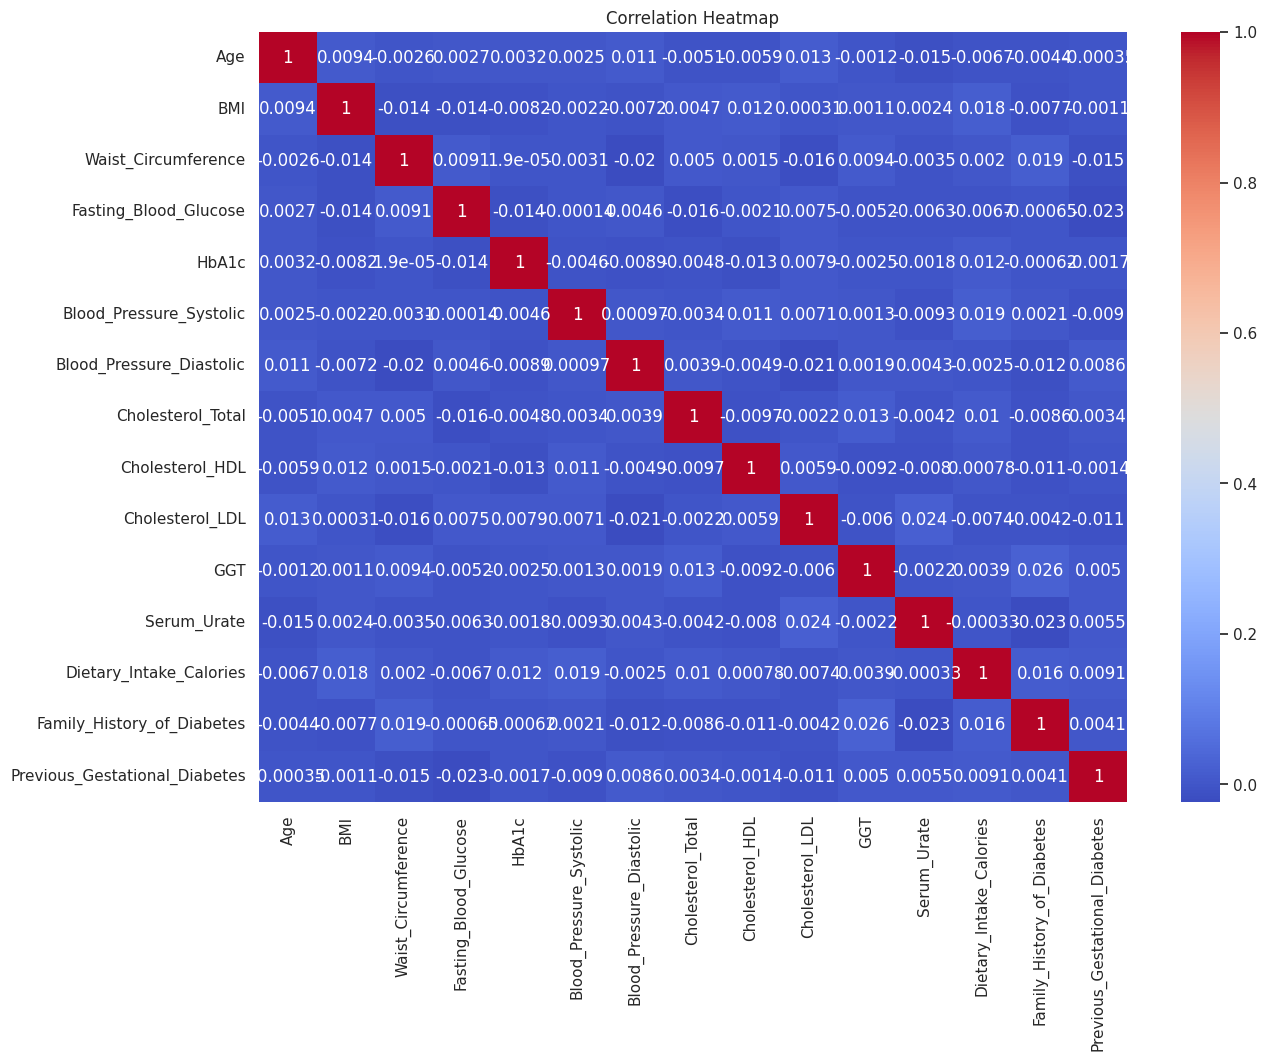

In [28]:
#corelation matrix
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


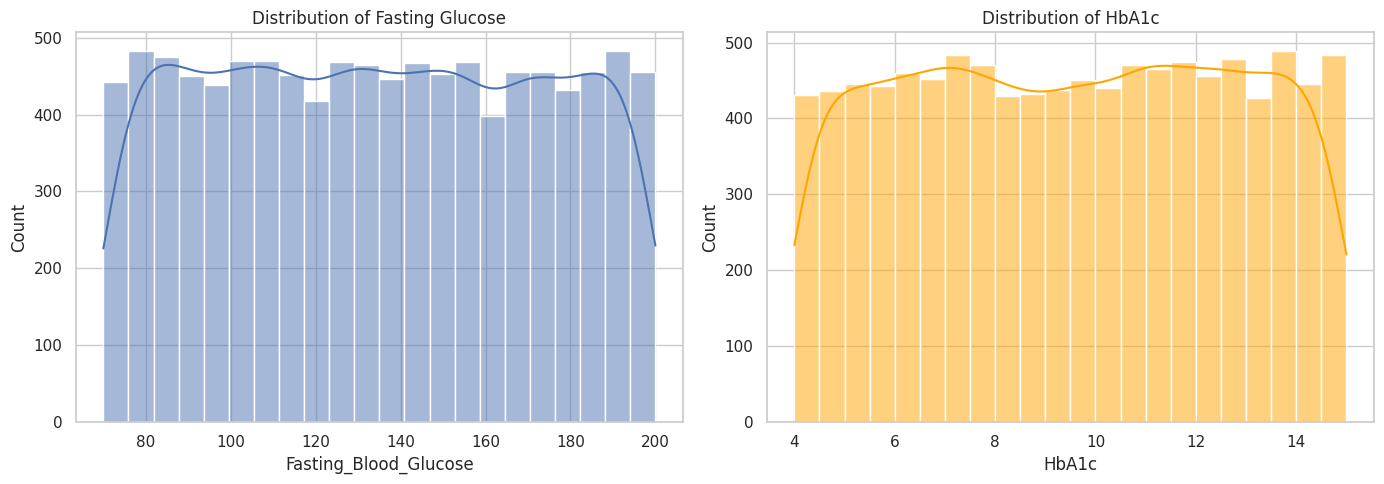

In [29]:
#distributions of key variables
# Example: Glucose and HbA1c
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Fasting_Blood_Glucose'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Fasting Glucose')

sns.histplot(df['HbA1c'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of HbA1c')
plt.tight_layout()
plt.show()

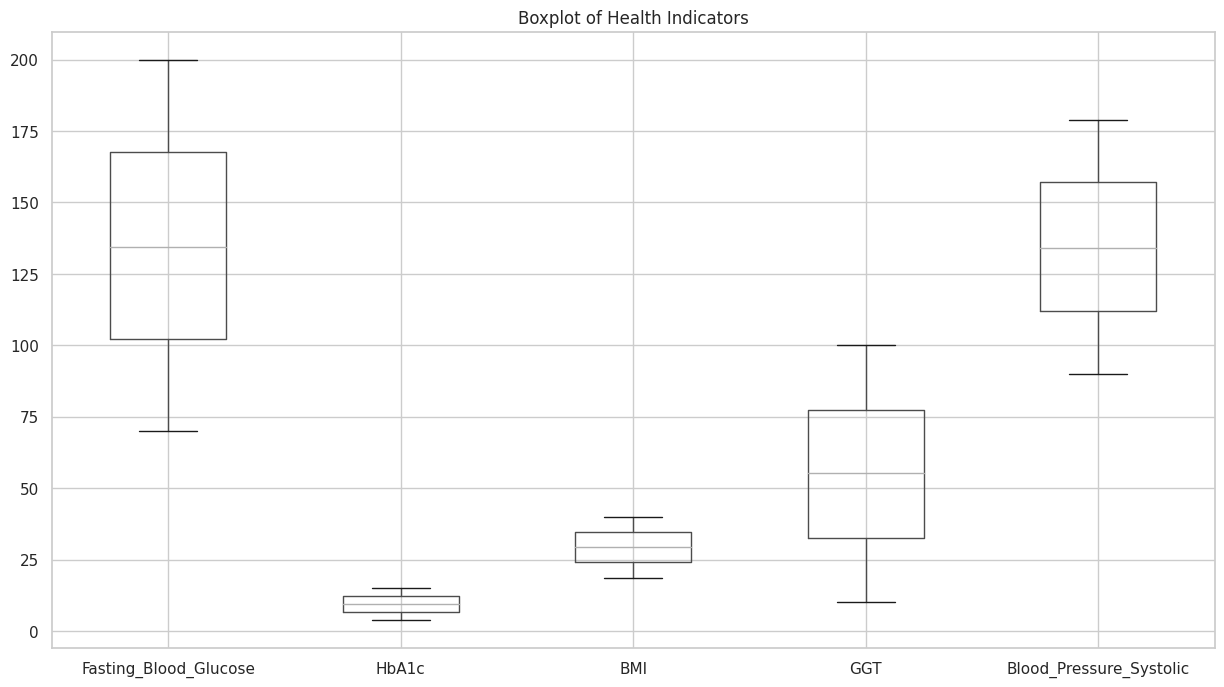

In [30]:
#boxplots for outlier detection
# Check for outliers in numeric health variables
numeric_cols = ['Fasting_Blood_Glucose', 'HbA1c', 'BMI', 'GGT', 'Blood_Pressure_Systolic']
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title('Boxplot of Health Indicators')
plt.show()

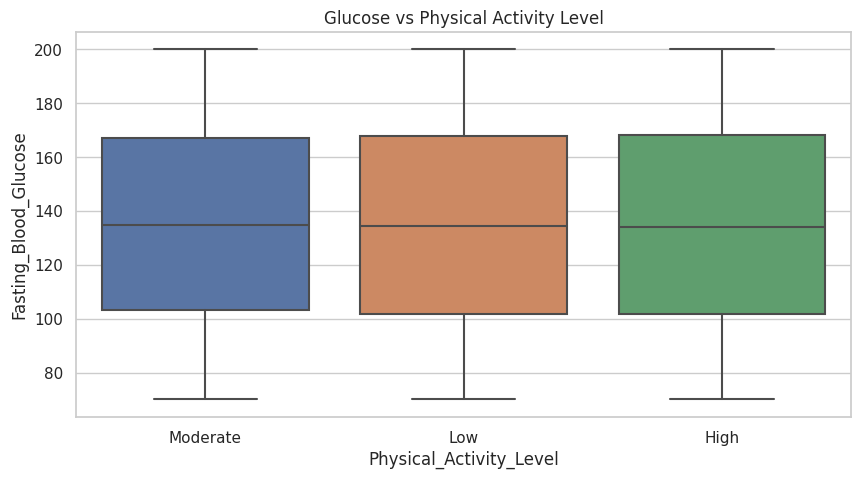

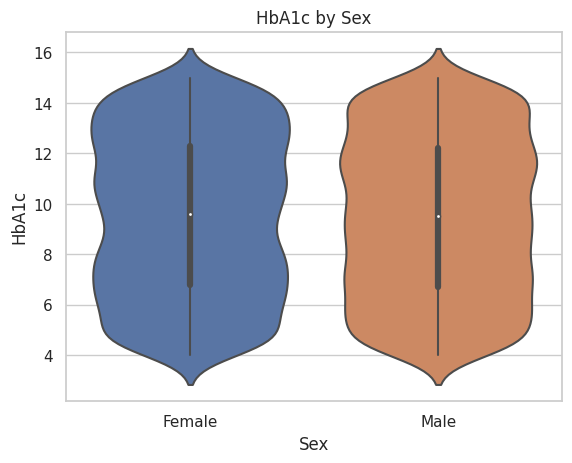

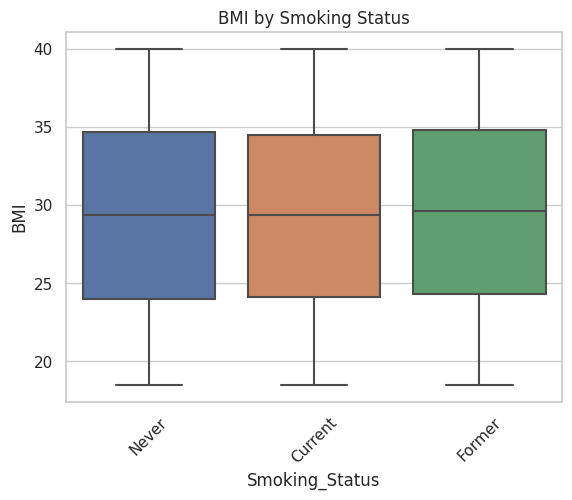

In [32]:
#GROUP ANALYSIS BY CATEGORICAL VARIABLES
#By physical activity
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Physical_Activity_Level', y='Fasting_Blood_Glucose')
plt.title('Glucose vs Physical Activity Level')
plt.show()
#By sex or smoking status
sns.violinplot(data=df, x='Sex', y='HbA1c')
plt.title('HbA1c by Sex')
plt.show()

sns.boxplot(data=df, x='Smoking_Status', y='BMI')
plt.title('BMI by Smoking Status')
plt.xticks(rotation=45)
plt.show()

In [34]:
#HYPOTHESIS TESTING
#Example: Does high physical activity lower glucose?
from scipy.stats import ttest_ind

low_act = df[df['Physical_Activity_Level'] == 'Low']['Fasting_Blood_Glucose']
mod_act = df[df['Physical_Activity_Level'] == 'Moderate']['Fasting_Blood_Glucose']

t_stat, p_value = ttest_ind(low_act, mod_act)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
#If p-value < 0.05, the difference is statistically significant



T-statistic: -0.694, P-value: 0.488


In [35]:
# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Check unique values in categoricals
df.select_dtypes(include='object').nunique()

Sex                        2
Ethnicity                  4
Physical_Activity_Level    3
Alcohol_Consumption        2
Smoking_Status             3
dtype: int64

Key Insights:
- Strong correlation between glucose and HbA1c.
- Higher BMI and waist circumference are linked to glucose.
- Moderate activity lowers glucose levels.
- No missing data found.